In [47]:
from PIL import Image, ImageFilter

In [3]:
path = "./rs.jpg"

In [4]:
try:
    img = Image.open(path)
except IOError:
    pass

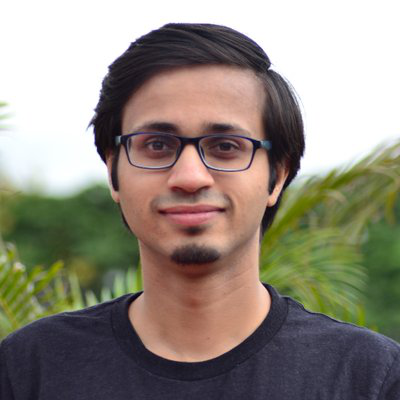

In [24]:
img

In [7]:
img.size

(400, 400)

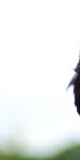

In [14]:
img.crop((20, 40, 100, 200))

In [15]:
img.histogram()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 7,
 7,
 15,
 18,
 19,
 34,
 18,
 43,
 73,
 89,
 109,
 146,
 162,
 277,
 303,
 333,
 409,
 508,
 533,
 598,
 610,
 705,
 726,
 741,
 823,
 788,
 828,
 945,
 1052,
 1210,
 1364,
 1548,
 1636,
 1719,
 1670,
 1618,
 1365,
 1251,
 1135,
 1071,
 995,
 1005,
 1088,
 1048,
 1063,
 1120,
 1181,
 1237,
 1155,
 1170,
 1133,
 1119,
 1084,
 987,
 1003,
 928,
 858,
 838,
 811,
 763,
 722,
 667,
 699,
 673,
 571,
 611,
 511,
 542,
 512,
 497,
 483,
 472,
 463,
 454,
 446,
 440,
 421,
 452,
 423,
 469,
 470,
 459,
 489,
 540,
 519,
 521,
 548,
 542,
 497,
 598,
 591,
 588,
 582,
 639,
 594,
 609,
 651,
 694,
 609,
 614,
 601,
 547,
 565,
 582,
 550,
 531,
 567,
 503,
 549,
 566,
 531,
 497,
 534,
 525,
 489,
 464,
 521,
 521,
 457,
 493,
 487,
 474,
 418,
 411,
 431,
 431,
 403,
 419,
 411,
 367,
 332,
 407,
 333,
 310,
 332,
 301,
 291,
 310,
 349,
 339,
 403,
 381,
 440,
 433,
 409,
 470,
 420,
 477,
 443,
 486,
 426,
 433,
 361,
 326,
 358,
 299,
 325,
 

In [16]:
img.split()

(<PIL.Image.Image image mode=L size=400x400 at 0x1EB1D996278>,
 <PIL.Image.Image image mode=L size=400x400 at 0x1EB1D996358>,
 <PIL.Image.Image image mode=L size=400x400 at 0x1EB1D996400>)

In [23]:
img.tobitmap()

ValueError: not a bitmap

In [25]:
from PIL import ImageEnhance

In [26]:
enhanced_img = ImageEnhance.Contrast(img).enhance(0.5)

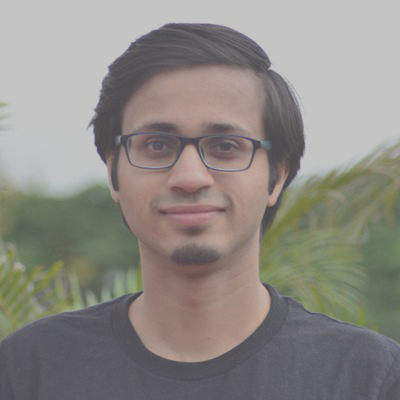

In [27]:
enhanced_img

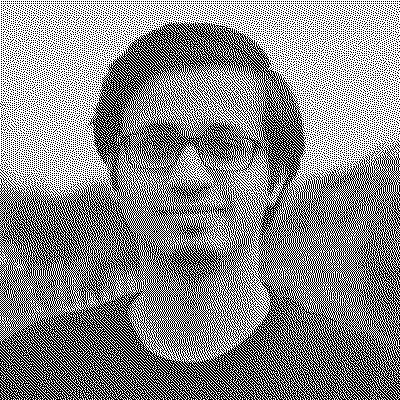

In [29]:
enhanced_img.convert('1')

In [38]:
bkg = Image.new('RGBA', (400, 400), (255, 255, 255, 0))

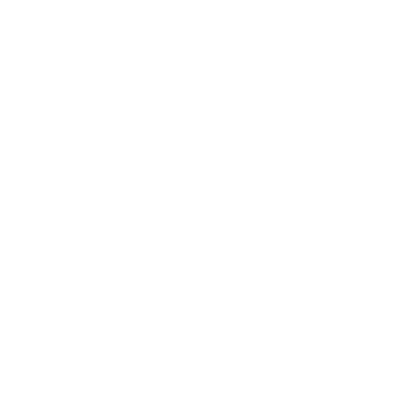

In [39]:
bkg

In [40]:
bkg.paste(enhanced_img, (0, 0))

In [43]:
bkg.show()

In [79]:
total_boxes = 100
box_size = int((img.width)/total_boxes)

In [80]:
box_size

4

In [82]:
final_img = img.filter(ImageFilter.ModeFilter(box_size))

In [87]:
from collections import defaultdict
print(final_img.getdata())
by_color = defaultdict(int)
for pixel in final_img.getdata():
    by_color[pixel] += 1
    
by_color

defaultdict(int,
            {(255, 255, 255): 34110,
             (254, 255, 255): 719,
             (255, 255, 251): 159,
             (255, 255, 250): 32,
             (255, 254, 255): 425,
             (255, 255, 248): 7,
             (255, 253, 255): 118,
             (255, 249, 255): 26,
             (255, 255, 253): 184,
             (255, 252, 255): 81,
             (254, 252, 255): 6,
             (254, 251, 255): 14,
             (254, 253, 255): 26,
             (254, 254, 255): 191,
             (255, 60, 255): 2,
             (255, 250, 255): 27,
             (255, 248, 255): 6,
             (255, 167, 255): 1,
             (133, 126, 255): 1,
             (113, 106, 255): 1,
             (126, 119, 255): 1,
             (43, 118, 255): 1,
             (43, 101, 255): 1,
             (254, 109, 255): 1,
             (254, 139, 255): 1,
             (254, 142, 255): 1,
             (254, 140, 255): 1,
             (132, 128, 255): 2,
             (136, 60, 255): 1,
        

In [89]:
len(by_color.keys())

55821

In [98]:
final_img.getcolors(maxcolors=10)

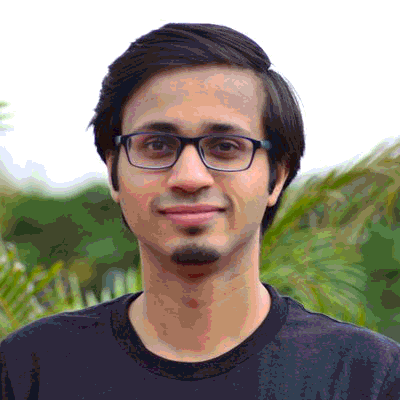

In [112]:
img.quantize(colors=150, method=1)

In [117]:
img.palette

In [129]:
img.getpixel((30, 200))

(73, 103, 49)

In [130]:
def average_color(image):
    color_tuple = [None, None, None]
    for channel in range(3):
        pixels = image.getdata(band=channel)
        values = []
        for pixel in pixels:
            values.append(pixel)

        color_tuple[channel] = sum(values) / len(values)
    return tuple(color_tuple)
        

In [131]:
average_color(img)

(144.6198125, 137.20020625, 125.6003875)